## <center>4. Feladatsor</center>

<img src="szakdoga.gif" width="700">
<br>
<br>
<b>1.feladat.</b> Tekintsük az

\begin{cases}
u'(t)= 1-u(t),&t\in[0,1]\\
u(0)=0&
\end{cases}


kezdetiérték-feladatot. Alkalmazzuk a feladatra az explicit Euler módszert az intervallumot $N$ egyenlő részintervallumra bontással! Ábrázoljuk eredményünket!



<br>


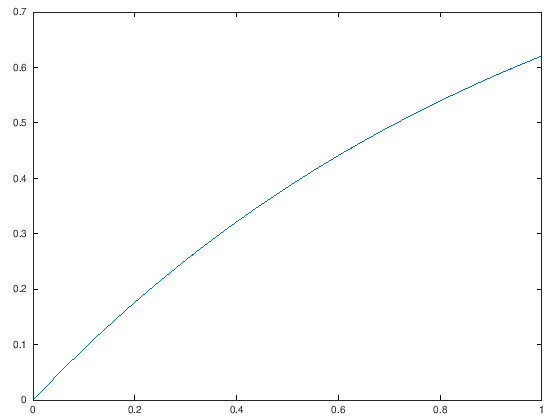

In [12]:
a=0; b=1; y0=0; N=16;
h=(b-a)/(N+1);
t=linspace(a,b,N+1);
y=zeros(1,N+1);
y(1)=y0;
for j=1:N
    y(j+1)=y(j)+h*(1-y(j));
end
plot(t,y)

<b>2.feladat.</b> Írjunk általános explicit Euler és RK4 programokat $a,b,y0,N$ input és $h,t,y$ paraméterekkel. Alkalmazzuk programjainkat az előző feladatra mérjük a globális hibát maximumnormában. Mit tapasztalunk $N$ számának növelésével?


<br>

In [6]:
format long
N=32;
[h,t,y]=expliciteuler(0,1,0,N);
exact=1-exp(-t);
hiba_EE=norm(y-exact,'inf')

[h,t,y]=RK4(0,1,0,N);
exact=1-exp(-t);
hiba_RK4=norm(y-exact,'inf')

hiba_EE =  0.00582415191512575
hiba_RK4 =    3.00080882364995e-09


<b>3.feladat.</b> Lotka-Volterra modell (Zsákmány-ragadozó modell, 1926) <a href="http://www.tankonyvtar.hu/hu/tartalom/tamop425/0038_informatika_Geda_Gabor-Modellezes_es_szimulacio_az_oktatasban/ch04s03.html">Történeti háttér</a><br>

Tekintsük a modell konkrét alakját:

$$P'_1(t)=\beta_1P_1(t)-\alpha_1P_1(t)P_2(t)$$
$$P'_2(t)=-\beta_2P_2(t)+\alpha_2P_1(t)P_2(t),$$

ahol $\alpha_i,\ \beta_{i}\in\mathbb{R}^+$ konstansok. $P'_1(t)$ a zsákmány (prey), míg $P'_2(t)$ a ragadozók (predator) időbeli válzoását jelentik. Tekintsük az alábbi paraméterek mellett a rendszert:

$\beta_1=0.6$, $\beta_2=0.6$, $\alpha_1=0.3\cdot 10^{-4}$, $\alpha_2=1.5\cdot 10^{-5}$, $P_1(0)=90000$ és $P_2(0)=2000$ a $[0,50]$-en<br>

Írjunk rendszerre vonatkozó EE és RK4 numerikus módszereket és alkalmazzuk a fenti esetben. Utóbbi esetében készítsünk ábrákat a két populáció méretéről az idő függvényében és a rendszer trajektóriájáról! Magyarázzuk a kapott eredményeket!

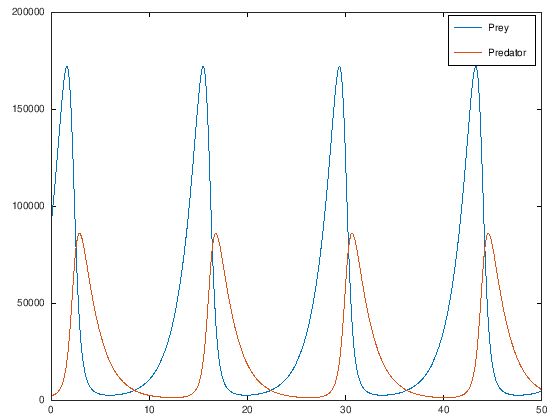

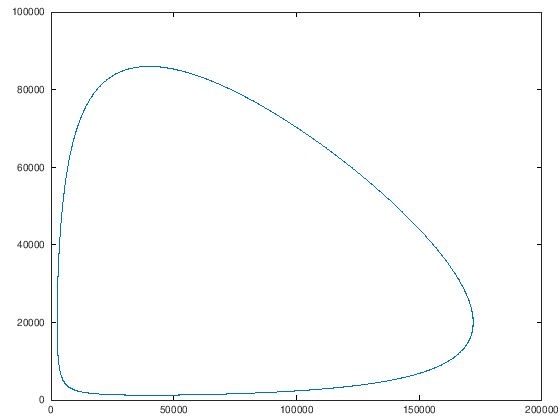

In [13]:
[h, t, y]=eesys(0,50,[90000; 2000],1000);
[h, t, y]=RK4sys(0,50,[90000; 2000],1000);
plot(t,y(1,:),t,y(2,:))
legend('Prey', 'Predator')
figure
plot(y(1,:),y(2,:))

<br>

<b>4.feladat.</b> Módosítsuk az RK4sys.m fájlt úgy, hogy a differenciálegyenlet jobboldala is bemenő paramatér legyen. Alkalmazzuk az új programot az előző feladatra!
<br>

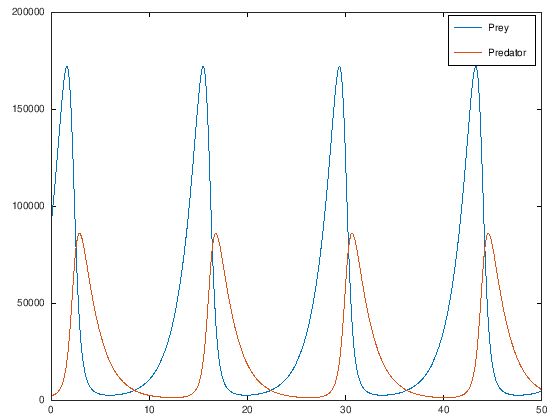

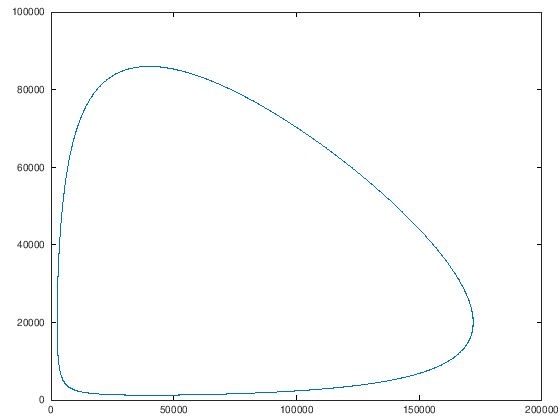

In [7]:
[h, t, y]=RK4sysmod(0,50,@(t,y)[0.6*y(1)-0.3*1e-4*y(1)*y(2); -0.6*y(2)+1.5*1e-5*y(1)*y(2)],[90000; 2000],1000);
plot(t,y(1,:),t,y(2,:))
legend('Prey', 'Predator')
figure
plot(y(1,:),y(2,:))

<br>

<b>5.feladat.</b> Alkalmazzuk a 3.feladatra a MATLAB beépített ode45 megoldóját!
<br>

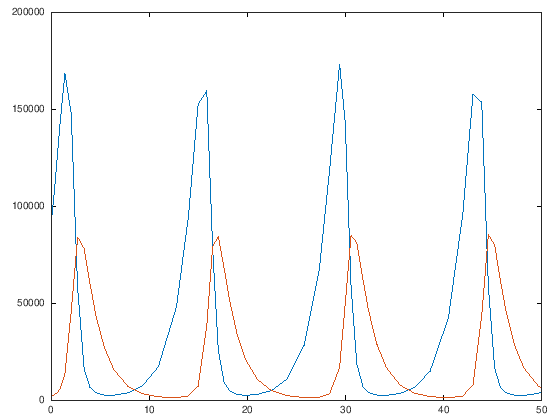

In [2]:
%Octave
[t,y] = ode45(@(t,y)[0.6*y(1)-0.3*1e-4*y(1)*y(2); -0.6*y(2)+1.5*1e-5*y(1)*y(2)],[0 50]',[90000 2000]');
plot(t,y)

%MATLAB
%[t,y] = ode45(@(t,y)[0.6*y(1)-0.3*1e-4*y(1)*y(2) -0.6*y(2)+1.5*1e-5*y(1)*y(2)]',[0 50],[90000 2000]);
%plot(t,y)
